In [1]:
import pandas as pd
import numpy as np
import pycaret
import time


C:\Users\91704\.conda\envs\pycaret\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\91704\.conda\envs\pycaret\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\91704\.conda\envs\pycaret\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('olist_orders_dataset.csv')

In [3]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv') # null value exist 
orders= pd.read_csv('olist_orders_dataset.csv') # null value exist 
products = pd.read_csv('olist_products_dataset.csv') # null value exist 
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

In [5]:
df1=pd.DataFrame(orders )  # = bydefo
df2=pd.DataFrame(order_payments)
df3 =pd.DataFrame(order_items)
df4 = pd.DataFrame(order_reviews)
df5 = pd.DataFrame(customers)
df6 = pd.DataFrame(products)
df7 = pd.DataFrame(geolocation)
df8 = pd.DataFrame(sellers)

In [6]:
df9 =pd.merge(df1,df2,on = 'order_id')
df10 =pd.merge(df3,df4,on = 'order_id')
df11 =pd.merge(df9,df10,on = 'order_id')
df12 =pd.merge(df1,df5,on = 'customer_id')
df13 =pd.merge(df11,df12,on = 'customer_id')
df14=pd.merge(df13,df6,on = 'product_id')
df15=pd.merge(df14,df8,on = 'seller_id')

In [7]:
df15.isnull().sum()

order_id_x                              0
customer_id                             0
order_status_x                          0
order_purchase_timestamp_x              0
order_approved_at_x                    15
order_delivered_carrier_date_x       1254
order_delivered_customer_date_x      2588
order_estimated_delivery_date_x         0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
review_id                               0
review_score                            0
review_comment_title               104226
review_comment_message              67650
review_creation_date                    0
review_answer_timestamp           

In [8]:
df15= df15.dropna()

In [9]:
df15.corr()

C:\Users\91704\AppData\Local\Temp\ipykernel_141548\3792209451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df15.corr()


,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
payment_sequential,1.000000,-0.096848,-0.062735,-0.029421,0.030863,0.032303,0.006332,0.023469,0.034334,-0.002134,0.020698,0.039394,0.042975,0.031179,0.069418,-0.012187
payment_installments,-0.096848,1.000000,0.299445,0.071894,0.285931,0.206856,-0.044747,0.074722,-0.006589,0.028758,0.003083,0.182883,0.116998,0.131362,0.123447,0.065634
payment_value,-0.062735,0.299445,1.000000,0.229237,0.759545,0.385819,-0.105944,0.093075,-0.002371,0.171892,0.019198,0.328983,0.190341,0.222107,0.167578,0.081759
order_item_id,-0.029421,0.071894,0.229237,1.000000,-0.070363,-0.050809,-0.157964,0.017115,-0.014169,-0.026038,-0.063703,0.021670,0.007425,0.072100,0.008871,-0.035254
price,0.030863,0.285931,0.759545,-0.070363,1.000000,0.424536,-0.017856,0.069972,0.016799,0.191279,0.063529,0.319663,0.181378,0.192859,0.168746,0.099320
freight_value,0.032303,0.206856,0.385819,-0.050809,0.424536,1.000000,-0.030374,0.265075,0.040768,0.131111,0.029657,0.593197,0.380547,0.364430,0.352866,0.185396
review_score,0.006332,-0.044747,-0.105944,-0.157964,-0.017856,-0.030374,1.000000,-0.021658,-0.006587,0.000289,0.025217,-0.043278,-0.012500,-0.053284,-0.006107,0.009698
customer_zip_code_prefix,0.023469,0.074722,0.093075,0.017115,0.069972,0.265075,-0.021658,1.000000,0.025309,0.033894,0.019782,0.004400,0.010760,0.019358,-0.012805,0.094747
product_name_lenght,0.034334,-0.006589,-0.002371,-0.014169,0.016799,0.040768,-0.006587,0.025309,1.000000,0.111258,0.190307,0.019185,0.036288,-0.042619,0.031504,0.000800
product_description_lenght,-0.002134,0.028758,0.171892,-0.026038,0.191279,0.131111,0.000289,0.033894,0.111258,1.000000,0.147823,0.100909,0.078471,0.094141,-0.032030,0.058099


In [10]:
from pycaret.regression import *


In [11]:
df16=df15[['payment_value','payment_installments','order_item_id','price','freight_value',]]

In [12]:
df16.shape


(11751, 5)

In [13]:
data = df16.sample(frac=0.9, random_state=786)
data_unseen = df16.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (10576, 5)
Unseen Data For Predictions: (1175, 5)


In [14]:
exp_reg101 = setup(data = data, target = 'payment_value', session_id=123) 

,Description,Value
0,Session id,123
1,Target,payment_value
2,Target type,regression
3,Data shape,"(10576, 5)"
4,Train data shape,"(7403, 5)"
5,Test data shape,"(3173, 5)"
6,Numeric features,4
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [15]:
best = compare_models(exclude = ['ransac'])


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,46.6744,22284.5640,141.9976,0.7662,0.4451,0.4580,1.2800
lightgbm,Light Gradient Boosting Machine,50.8380,24566.3749,149.2241,0.7526,0.4594,0.5531,0.1000
gbr,Gradient Boosting Regressor,48.9264,25186.5473,152.4618,0.7362,0.4687,0.5918,0.3230
catboost,CatBoost Regressor,47.0267,26213.1833,153.4100,0.7204,0.4504,0.5232,2.2450
xgboost,Extreme Gradient Boosting,46.3664,25956.4379,151.0490,0.7179,0.4420,0.5076,0.4190
et,Extra Trees Regressor,49.6679,26618.5310,157.5007,0.7144,0.4864,0.4569,0.9080
ridge,Ridge Regression,55.3315,31819.1959,168.8488,0.6740,0.4940,0.5889,0.0170
lar,Least Angle Regression,55.3301,31819.2695,168.8490,0.6740,0.4940,0.5889,0.0170
br,Bayesian Ridge,55.3463,31819.1500,168.8485,0.6740,0.4940,0.5893,0.0250
lasso,Lasso Regression,55.4350,31818.6829,168.8518,0.6740,0.4937,0.5927,0.0230


In [16]:
#models()
print(best)

RandomForestRegressor(n_jobs=-1, random_state=123)


In [17]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
rf = create_model('rf')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,41.4214,7056.7618,84.0045,0.8621,0.4854,0.5817
1,50.2917,38162.2085,195.3515,0.4844,0.4231,0.3236
2,49.1293,46300.3204,215.1751,0.6869,0.4496,0.3909
3,49.0800,26989.4244,164.2846,0.7008,0.4521,0.3726
4,44.6029,11596.3786,107.6865,0.8469,0.4646,0.4911
5,50.7348,21496.1125,146.6155,0.8782,0.4331,0.4494
6,51.9913,38999.8971,197.4839,0.7017,0.4539,0.4972
7,40.7484,8768.5450,93.6405,0.8470,0.4458,0.7752
8,38.8624,9551.8978,97.7338,0.8297,0.4132,0.3508
9,49.8818,13924.0941,118.0004,0.8241,0.4302,0.3477


In [19]:
print(rf)


RandomForestRegressor(n_jobs=-1, random_state=123)


In [20]:
lightgbm = create_model('lightgbm')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,45.1653,9997.0621,99.9853,0.8047,0.4969,0.6281
1,52.4649,31418.7496,177.2533,0.5755,0.4453,0.3800
2,55.4480,39752.2762,199.3797,0.7312,0.4558,0.4402
3,54.4690,28194.4778,167.9121,0.6875,0.4524,0.4092
4,48.4173,11779.4922,108.5334,0.8445,0.4715,0.5206
5,56.5014,47051.5714,216.9137,0.7333,0.4656,0.9567
6,56.6750,45666.1212,213.6963,0.6507,0.4558,0.5592
7,44.6637,10440.1285,102.1769,0.8178,0.4515,0.7961
8,42.5495,9500.9006,97.4726,0.8306,0.4359,0.4170
9,52.0265,11862.9689,108.9173,0.8501,0.4630,0.4241


In [21]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,47.4820,12879.2653,113.4869,0.7483,0.5694,0.6406
1,61.1580,41228.5343,203.0481,0.4429,0.5672,0.3759
2,55.4870,56600.5604,237.9087,0.6172,0.5894,0.3827
3,55.9787,32501.2838,180.2811,0.6397,0.5959,0.4294
4,47.9992,19786.8124,140.6656,0.7388,0.5419,0.5147
5,51.4492,42636.2044,206.4854,0.7583,0.5354,0.4470
6,73.7567,96488.8033,310.6265,0.2619,0.6606,0.5076
7,45.5416,13443.8240,115.9475,0.7653,0.5427,0.7813
8,43.7721,18977.1059,137.7574,0.6617,0.4868,0.3467
9,68.8313,63568.2176,252.1274,0.1968,0.5378,0.3796


In [22]:
tuned_rf = tune_model(rf)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,43.0865,9243.4434,96.1428,0.8194,0.5049,0.6635
1,50.8570,37166.5323,192.7862,0.4978,0.4543,0.4191
2,50.0269,34133.4066,184.7523,0.7692,0.4627,0.4703
3,52.9842,30678.2154,175.1520,0.6599,0.4728,0.4510
4,44.8382,11050.8989,105.1233,0.8541,0.4640,0.5136
5,55.7454,44906.9463,211.9126,0.7455,0.4750,0.9667
6,52.5175,39157.0192,197.8813,0.7005,0.4693,0.6348
7,39.6836,8230.0877,90.7198,0.8564,0.4616,0.8803
8,41.5438,9032.1899,95.0378,0.8390,0.4468,0.4470
9,47.8279,11395.4180,106.7493,0.8560,0.4633,0.4405


In [23]:
tuned_lightgbm = tune_model(lightgbm)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,50.3030,8873.4279,94.1989,0.8266,0.5528,0.6278
1,60.1113,39881.2756,199.7030,0.4611,0.4921,0.4467
2,60.5871,28738.6058,169.5246,0.8056,0.5011,0.5146
3,55.5051,21055.5998,145.1055,0.7666,0.4768,0.4394
4,52.3873,11901.9435,109.0960,0.8429,0.5206,0.5956
5,59.9159,30961.1889,175.9579,0.8245,0.4921,0.9209
6,69.9416,53569.4506,231.4508,0.5902,0.5466,0.6712
7,51.3880,10169.2800,100.8428,0.8225,0.5232,0.9182
8,50.2883,11975.4690,109.4325,0.7865,0.4926,0.4702
9,56.2628,12136.4844,110.1657,0.8466,0.5374,0.4593


In [24]:
print(tuned_lightgbm)


LGBMRegressor(bagging_fraction=0.9, bagging_freq=3, feature_fraction=0.5,
              learning_rate=0.4, min_child_samples=6, min_split_gain=0.3,
              n_estimators=20, num_leaves=150, random_state=123,
              reg_alpha=0.005, reg_lambda=0.0005)


In [25]:
tuned_dt = tune_model(dt)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,42.1396,13501.9879,116.1981,0.7362,0.5100,0.5657
1,49.1938,33974.3320,184.3213,0.5410,0.4711,0.3518
2,46.4709,32104.4577,179.1772,0.7829,0.4657,0.3891
3,50.8145,32709.6557,180.8581,0.6374,0.4847,0.3617
4,43.7740,17151.2952,130.9630,0.7736,0.4766,0.4454
5,59.4278,79112.8610,281.2701,0.5516,0.5035,0.8897
6,53.4720,42710.0822,206.6642,0.6733,0.4877,0.5797
7,40.2494,10637.9825,103.1406,0.8143,0.4676,0.7406
8,37.1872,9661.8091,98.2945,0.8277,0.4473,0.3452
9,53.4267,31250.9774,176.7795,0.6051,0.4752,0.3619


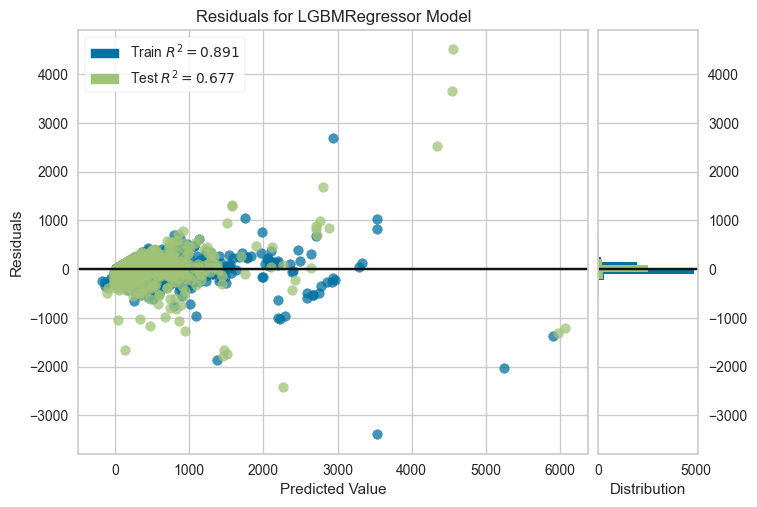

In [26]:
plot_model(tuned_lightgbm)


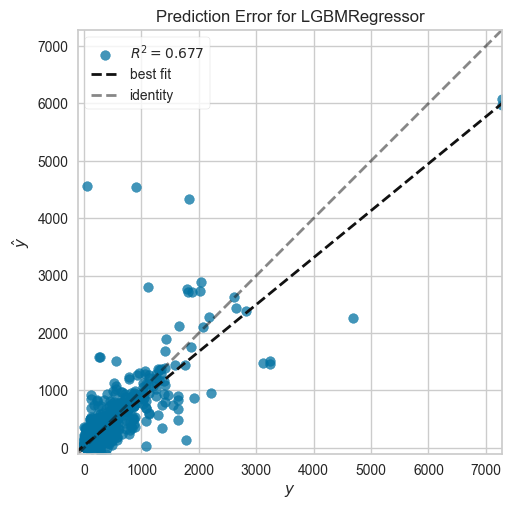

In [27]:
plot_model(tuned_lightgbm, plot = 'error')


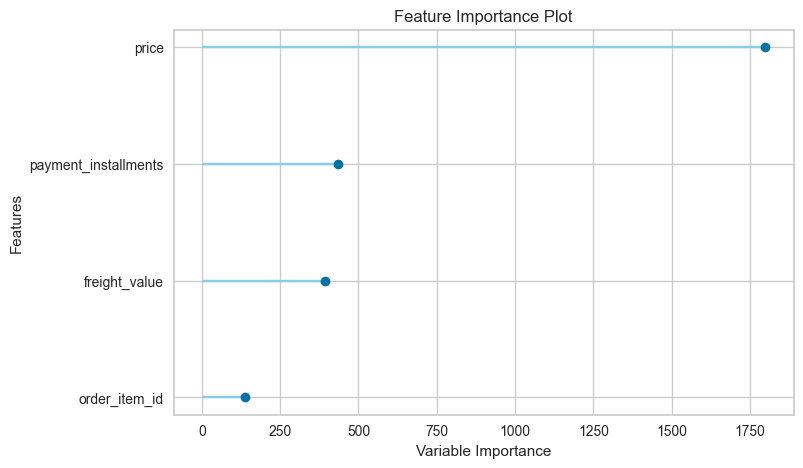

In [28]:
plot_model(tuned_lightgbm, plot='feature')


In [29]:
predict_model(tuned_lightgbm);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,61.7402,34430.8585,185.5555,0.6774,0.5785,2.1756


In [30]:
final_tuned_lightgbm = finalize_model(tuned_lightgbm)


In [31]:
print(final_tuned_lightgbm)


LGBMRegressor(bagging_fraction=0.9, bagging_freq=3, feature_fraction=0.5,
              learning_rate=0.4, min_child_samples=6, min_split_gain=0.3,
              n_estimators=20, num_leaves=150, random_state=123,
              reg_alpha=0.005, reg_lambda=0.0005)


In [32]:
predict_model(final_tuned_lightgbm);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,41.5101,8311.7566,91.1688,0.9221,0.4764,3.1361


In [33]:
unseen_predictions = predict_model(final_tuned_lightgbm, data=data_unseen)
unseen_predictions.head()


,payment_installments,order_item_id,price,freight_value,Label
0,1,1,116.90,9.33,142.117193
1,3,1,118.80,15.93,119.857233
2,2,1,119.90,15.72,127.939856
3,2,2,119.90,15.72,208.165917
4,4,1,29.99,18.31,57.582566


In [36]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.Label, 'R2')


0.3541

In [38]:
save_model(final_tuned_lightgbm,'final_tuned_lightgbm model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\91704\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransfomerWrapper(include=['payment_installments', 'order_item_id', 'price', 'freight_value'], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransfomerWrapper(include=[], transformer=SimpleImputer(fill_value='constant', strategy='constant'))),
                 ['trained_model',
                  LGBMRegressor(bagging_fraction=0.9, bagging_freq=3,
                                feature_fraction=0.5, learning_rate=0.4,
                                min_child_samples=6, min_split_gain=0.3,
                                n_estimators=20, num_leaves=150,
                                random_state=123, reg_alpha=0.005,
                                reg_lambda=0.0005)]]),
 'final_tuned_lightgbm model.pkl')

In [39]:
saved_final_tuned_lightgbm= load_model('final_tuned_lightgbm model')


Transformation Pipeline and Model Successfully Loaded


In [40]:
new_prediction = predict_model(saved_final_tuned_lightgbm, data=data_unseen)


In [41]:
new_prediction.head()


,payment_installments,order_item_id,price,freight_value,Label
0,1,1,116.90,9.33,142.117193
1,3,1,118.80,15.93,119.857233
2,2,1,119.90,15.72,127.939856
3,2,2,119.90,15.72,208.165917
4,4,1,29.99,18.31,57.582566


In [42]:
from pycaret.utils import check_metric
check_metric(new_prediction.price, new_prediction.Label, 'R2')

0.3541

In [43]:
predict_model(final_tuned_lightgbm, drift_report = True)


Light Gradient Boosting Machine_Drift_Report.html saved successfully.


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,41.5101,8311.7566,91.1688,0.9221,0.4764,3.1361


,payment_installments,order_item_id,price,freight_value,payment_value,Label
7403,1,1,39.990002,7.54,47.529999,49.390200
7404,1,1,79.900002,13.00,92.900002,92.563882
7405,1,1,12.900000,18.23,31.129999,32.413796
7406,3,1,15.490000,18.23,67.440002,51.016397
7407,1,1,26.400000,13.77,40.169998,45.467936
...,...,...,...,...,...,...
10571,3,2,159.899994,19.48,473.209991,411.859842
10572,1,1,33.889999,17.17,51.060001,61.268753
10573,1,1,69.989998,14.07,73.889999,86.341938
10574,1,1,79.900002,23.49,103.389999,101.739217
